<font color="blue" size=5><b>Inferential Statistics</b></font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<font color="red" size=3><b>Goal: To infer the average fare of population by T test with 95% confidence interval<br></b></font>


Goal: To infer average fare of population by T test with 95% confidence interval<br>
Idea: Apply CLT -> point estimate-> T procedure

**Dataset** https://www.kaggle.com/datasets/jamesleslie/titanic-cleaned-data

In [54]:
train = pd.read_csv("train_clean.csv")
test = pd.read_csv("test_clean.csv")


In [55]:
df = pd.concat([train,test]).sample(1309)
df.size

18326

<font color="red" size=3><b>Population distribution</b></font>

C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

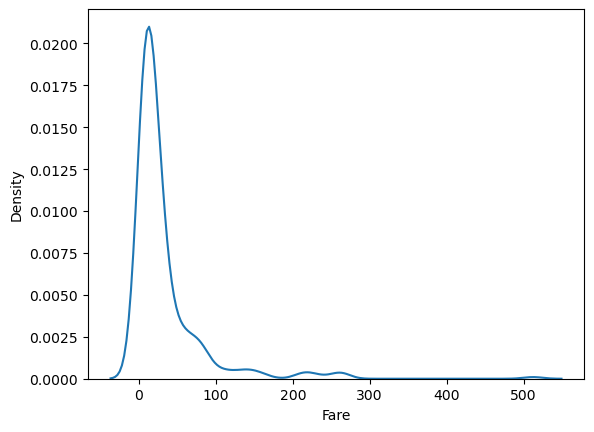

In [56]:
sns.kdeplot(df['Fare'])

<font color="red" size=3><b>Sample distribution</b></font>

C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

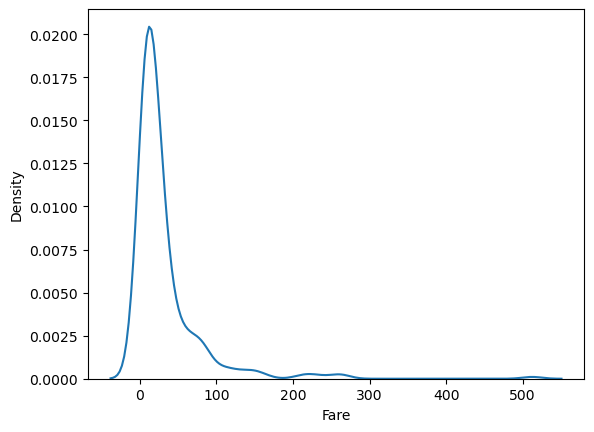

In [64]:
sns.kdeplot(train['Fare'])

**This is not a normal distribution so we need to perform CLT**

In [57]:
# creating a sample of 30, 100 times
samples = []
stds =[]
for i in range(10):
    x = train['Fare'].dropna().sample(30).values 
    stds.append(np.std(x))
    samples.append(x.tolist())

In [58]:
samples = np.array(samples)

In [59]:
sample_mean = samples.mean(axis=1)
sample_std = np.mean(stds)

C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

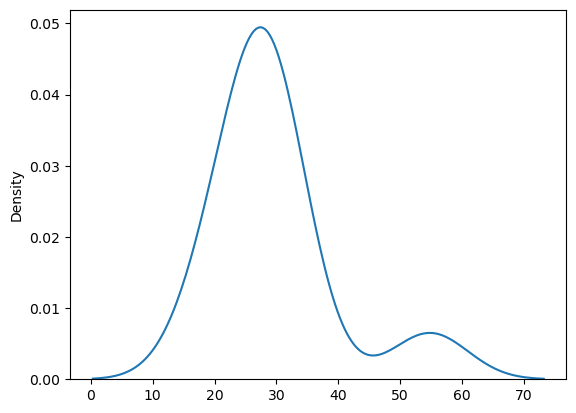

In [60]:
sns.kdeplot(sample_mean)

<font color="red" size=3><b>Confidence interval with 95% confidence level</b></font>

In [61]:
lower_limit = sample_mean.mean() -2.042*(sample_std/np.sqrt(30))
upper_limit = sample_mean.mean() +2.042*(sample_std/np.sqrt(30))

In [62]:
print("The range is ", lower_limit,"-",upper_limit)

The range is  14.036978735889422 - 44.979323264110576


In [63]:
df['Fare'].mean()

33.27619320091674